### 빈혈 여부 분류 데이터 세트

- Gender: 성별  
- Hemoglobin: 혈중 헤모글로빈 수치  
- MCH: 평균 혈구내 혈색소양  
- MCHC: 평균 혈구내 헤모글로빈농도  
- MCV: 평균 적혈구 용적
- Result: 0: 빈혈 없음(음성), 1: 빈혈 있음(양성)

💡 정밀도와 재현율 수립

TP (True Positive): 실제로 빈혈이 있는 경우(1)인데, 모델이 빈혈이 있다고 예측한 경우  
FP (False Positive): 실제로 빈혈이 없는 경우(0)인데, 모델이 빈혈이 있다고 예측한 경우 (error 1)  
TN (True Negative): 실제로 빈혈이 없는 경우(0)인데, 모델이 빈혈이 없다고 예측한 경우  
FN (False Negative): 실제로 빈혈이 있는 경우(1)인데, 모델이 빈혈이 없다고 예측한 경우 (error 2)  

FN이 더 치명적 오류이다. TP를 향상 시켜서 재현율을 향상 시켜야한다.

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/anemia.csv')

df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


### 데이터 탐색 및 1차 전처리 시작

In [2]:
df.isna().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [3]:
df.duplicated().sum()

887

In [4]:
pre_df = df.copy()
pre_df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [5]:
pre_df = pre_df.drop_duplicates().reset_index(drop=True)
pre_df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
529,0,11.8,21.2,28.4,98.1,1
530,1,15.1,21.3,32.4,100.6,0
531,1,14.8,19.5,32.2,72.1,0
532,1,13.2,20.4,28.0,97.4,1


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Hemoglobin'}>],
       [<Axes: title={'center': 'MCH'}>,
        <Axes: title={'center': 'MCHC'}>],
       [<Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Result'}>]], dtype=object)

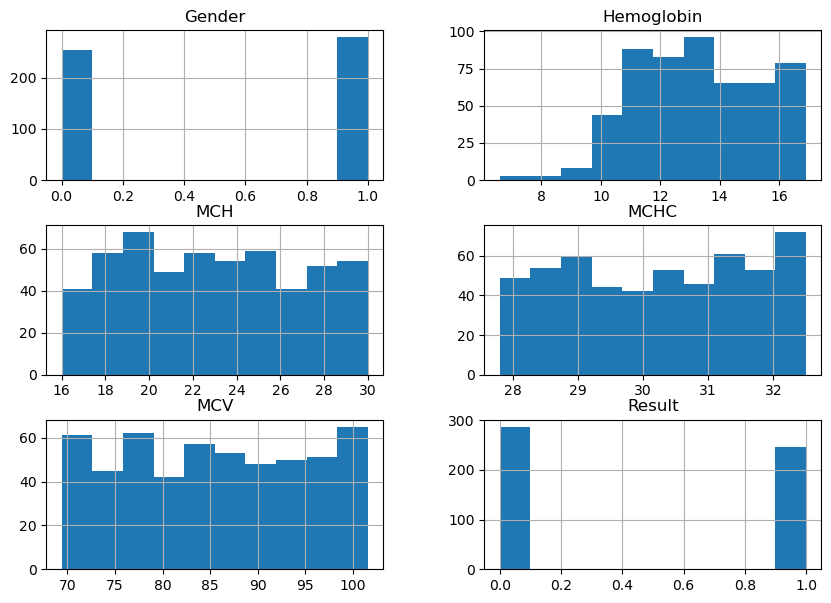

In [6]:
pre_df.hist(figsize=(10, 7))

In [7]:
pre_df.Result.value_counts()

Result
0    287
1    247
Name: count, dtype: int64

### 📝 데이터 1차 전처리 결과

1. 결측치가 없었다.
2. 중복치가 887개가 있어서 중복치를 제거 했다.
3. target 데이터의 비중이 약간 다르기 때문에 언더샘플링으로 비중을 맞춰줘야 할듯 하다.

In [8]:
good_df = pre_df[pre_df['Result'] == 0].sample(247, random_state=124) 
bad_df = pre_df[pre_df['Result'] == 1]
pre_df = pd.concat([good_df, bad_df]).reset_index(drop=True)
pre_df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,16.5,28.0,32.2,99.3,0
1,1,13.8,21.4,29.9,88.4,0
2,0,13.1,21.8,30.8,90.4,0
3,0,14.9,24.4,30.1,94.7,0
4,1,14.8,29.6,31.7,91.6,0
...,...,...,...,...,...,...
489,1,12.1,28.3,30.4,86.9,1
490,1,13.1,17.7,28.1,80.7,1
491,0,11.8,21.2,28.4,98.1,1
492,1,13.2,20.4,28.0,97.4,1


In [9]:
pre_df.Result.value_counts()

Result
0    247
1    247
Name: count, dtype: int64

#### 📝 언더 샘플링을 통해서 Result의 비중을 맞춰주었다.

#### 🤔 OLS와 다중 공선성, 독립변수와의 연관성을 확인 해보도록 하겠다.

In [10]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Result   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              476.5
Date:                Tue, 14 May 2024   Prob (F-statistic):                   2.38e-185
Time:                        11:31:05   Log-Likelihood:                         -92.520
No. Observations:                 494   AIC:                                      195.0
Df Residuals:                     489   BIC:                                      216.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
pre_df.corr()['Result'].sort_values(ascending=False)[1:]

Gender        0.211152
MCHC          0.055207
MCV          -0.000042
MCH          -0.004480
Hemoglobin   -0.802141
Name: Result, dtype: float64

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
get_vif(features)

,vif_score,feature
0,2.180831,Gender
1,37.897735,Hemoglobin
2,32.905624,MCH
3,119.288832,MCHC
4,71.230256,MCV


<Axes: >

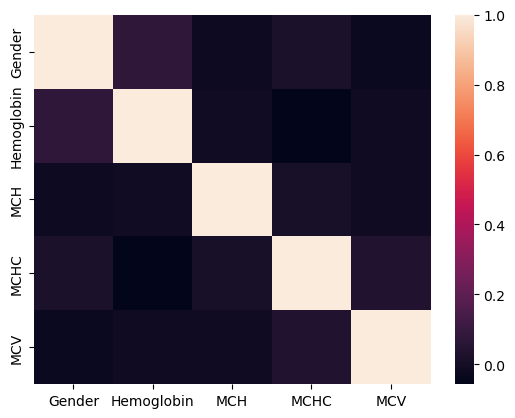

In [14]:
import seaborn as sns

sns.heatmap(features.corr())

1. OLS를 확인 했을 때, p-vlaue가 0.05를 넘는 것은 MCH가 0.064로 하나가 있었다.  
이 정도는 인용 가능한 수치인 듯 하다.

2. 다중 공선성을 확인 했을 때, MCHC가 가장 높았다.

3. 마지막으로 corr을 확인 했을 때, MCV가 독립변수와의 연관성이 가장 낮았다.

4. Heatmap을 통해서 전체적으로 연관성이 낮은 것을 알 수 있었다.

따라서 독립변수를 따로 삭제하지 않고 최초 훈련을 진행해보도록 하겠다.

### Cycle 1. 최초 훈련

In [25]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((5, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.002)

# 반복 횟수
epochs = 10000

for epoch in range(1, epochs + 1):
    # 가설 선언
    # H = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))
    H = torch.sigmoid(X_train.matmul(W) + b)

    # 손실 함수 선언
    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    loss= binary_cross_entropy(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100 epoch 단위로 로그 출력
    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

1000/10000: W1: 0.1169, W2: -1.1983, W3: 0.1150, b: 0.0084, loss: 0.6106
2000/10000: W1: 0.2319, W2: -1.3668, W3: 0.0880, b: 0.0184, loss: 0.2443
3000/10000: W1: 0.3383, W2: -1.4598, W3: 0.0779, b: 0.0260, loss: 0.2325
4000/10000: W1: 0.4398, W2: -1.5392, W3: 0.0777, b: 0.0331, loss: 0.2236
5000/10000: W1: 0.5372, W2: -1.6061, W3: 0.0793, b: 0.0399, loss: 0.2163
6000/10000: W1: 0.6308, W2: -1.6632, W3: 0.0810, b: 0.0466, loss: 0.2100
7000/10000: W1: 0.7210, W2: -1.7127, W3: 0.0825, b: 0.0532, loss: 0.2045
8000/10000: W1: 0.8081, W2: -1.7562, W3: 0.0838, b: 0.0598, loss: 0.1996
9000/10000: W1: 0.8921, W2: -1.7949, W3: 0.0849, b: 0.0663, loss: 0.1952
10000/10000: W1: 0.9734, W2: -1.8297, W3: 0.0859, b: 0.0727, loss: 0.1912


In [26]:
print(H)
print(H >= 0.5)
print(W, b)

tensor([[2.1232e-01],
        [8.2848e-01],
        [9.4764e-01],
        [3.0706e-02],
        [2.0748e-01],
        [9.8849e-01],
        [8.0969e-01],
        [9.5224e-01],
        [1.3307e-01],
        [9.6766e-01],
        [1.5889e-02],
        [6.5249e-01],
        [5.3676e-01],
        [9.9689e-01],
        [7.1268e-01],
        [9.7638e-01],
        [1.1585e-03],
        [8.6497e-02],
        [9.7823e-01],
        [3.8264e-03],
        [7.6788e-01],
        [9.9915e-01],
        [7.4618e-01],
        [8.1759e-03],
        [9.9603e-01],
        [8.5233e-01],
        [7.8328e-04],
        [9.8697e-01],
        [2.3097e-03],
        [3.0813e-04],
        [2.7122e-02],
        [2.3508e-01],
        [8.5148e-03],
        [9.8577e-01],
        [2.9296e-01],
        [1.5368e-01],
        [8.8371e-01],
        [9.2916e-01],
        [8.4912e-02],
        [2.6554e-02],
        [2.1039e-03],
        [9.4661e-01],
        [2.1565e-04],
        [4.8274e-01],
        [9.9420e-01],
        [2

In [27]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [28]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

오차 행렬
[[40  9]
 [ 3 47]]
정확도: 0.8788, 정밀도: 0.8393, 재현율: 0.9400, F1:0.8868, AUC:0.8782
###########################################################################


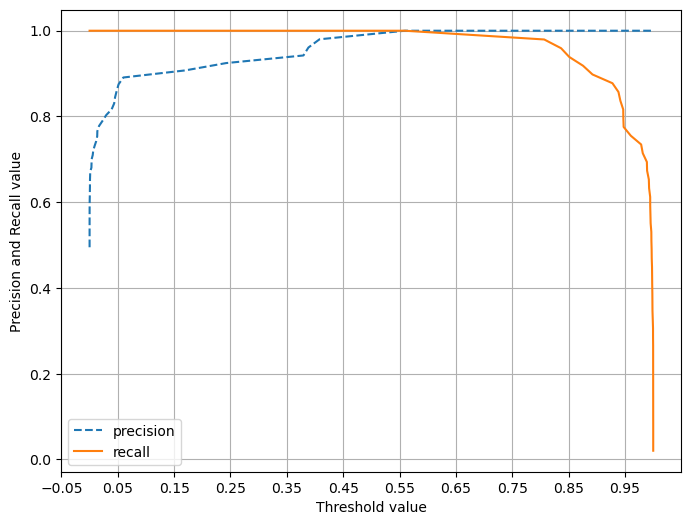

In [109]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

최초 훈련을 진행 했을 때, 점수들이 매우 높게 왔다.  
과적합을 의심 해볼 필요가 있을 듯 하다.

### Cycle 2. 과적합 여부 확인

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 특성과 타겟 분리
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# LogisticRegression 모델 설정 및 학습 (max_iter 추가)
logistic_r = LogisticRegression(solver='liblinear', penalty='l1', C=1, max_iter=1000, random_state=124)
logistic_r.fit(X_train, y_train)

# 학습 데이터 성능 평가
train_predictions = logistic_r.predict(X_train)
train_probabilities = logistic_r.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_auc = roc_auc_score(y_train, train_probabilities)

print(f"학습 데이터 - 정확도: {train_accuracy:.4f}, 정밀도: {train_precision:.4f}, 재현율: {train_recall:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}")

# 테스트 데이터 성능 평가
test_predictions = logistic_r.predict(X_test)
test_probabilities = logistic_r.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_auc = roc_auc_score(y_test, test_probabilities)

print(f"테스트 데이터 - 정확도: {test_accuracy:.4f}, 정밀도: {test_precision:.4f}, 재현율: {test_recall:.4f}, F1: {test_f1:.4f}, AUC: {test_auc:.4f}")


학습 데이터 - 정확도: 0.9544, 정밀도: 0.9500, 재현율: 0.9596, F1: 0.9548, AUC: 0.9937
테스트 데이터 - 정확도: 0.9394, 정밀도: 0.9574, 재현율: 0.9184, F1: 0.9375, AUC: 0.9967


### 📝 과적합 여부 확인 결과

1. 해당 모델은 학습 데이터와 테스트 데이터에서 일관된 성능을 보이며, 과적합의 징후는 보이지 않는다.  
2. 모델의 성능은 매우 우수하며, 학습 데이터와 테스트 데이터 모두에서 높은 정확도, 정밀도, 재현율, F1 점수, AUC를 보인다.   

### 📋 Total Result

1. 해당 데이터 세트를 Logistic Regressor로 진행한 결과 굉장히 높은 점수들이 나왔다.
2. 첫 훈련에 높은 점수들이 나와서 과적합을 의심하여 학습 데이터와 테스트 데이터에 대해 각각 훈련하여 점수들을 확인 하였을 때, 두 데이터들간의 점수차가 작게 나와 과적합이 아님을 알 수 있었다.
3. 당초에 수립 했던 정밀도와 재현율을 조정하려고 했으나 재현율과 정밀도의 점수가 잘 나와서 임계값 조정을 통해 재현율을 더 상승 시키는 작업은 하지 않았다.  